*   AUTHOR: K. K. N. SHYAM SATHVIK
*   ROLL. NO: B22EE036





---



# <b> Programming Assignment-5 (Lab-9&10)

## <b>CSL2050 - Pattern Recognition and Machine Learning


### <b> TASK 2 : Support Vector Machine

In [37]:
import warnings
warnings.filterwarnings('ignore')

## Imports

In [38]:
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Task Specific Imports

In [39]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons

### Task-1
<li>(a): Load the Iris dataset using the following code:

In [40]:
iris = datasets.load_iris(as_frame=True)

In [41]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [42]:
print(iris.target)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [43]:
print(iris.data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [44]:
display(iris.frame)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [46]:
df = iris.frame

In [47]:
# dropping virginica
df = df[(df['target'] == 0) | (df['target'] == 1)]  # setosa and versicolor
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

In [48]:
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


#### Data Processing

In [49]:
# normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### Data Visualization

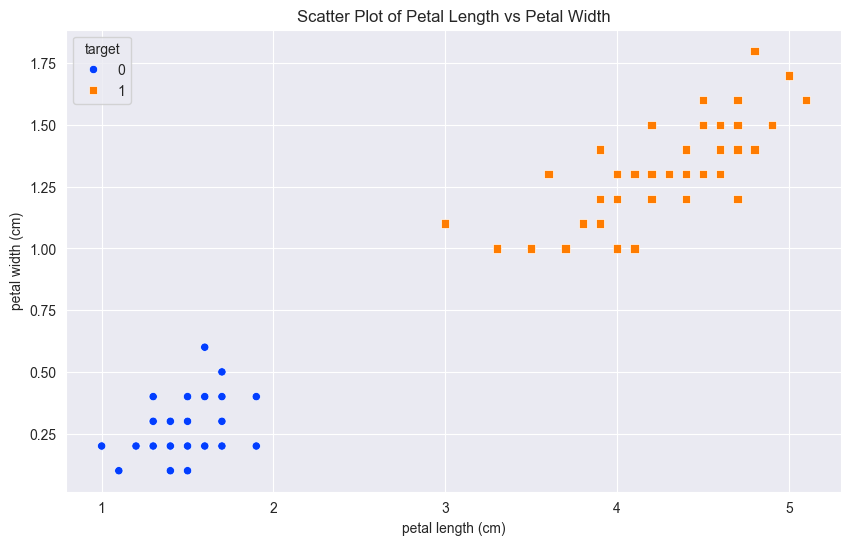

In [51]:
sns.set_style("darkgrid")

# petal length vs petal width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', style='target', palette='bright', markers=['o', 's'])
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

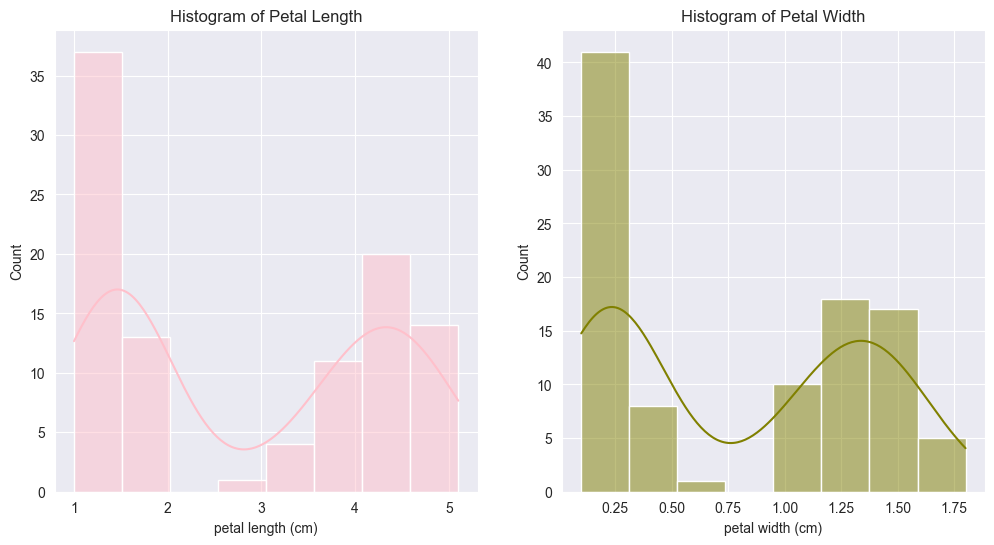

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['petal length (cm)'], kde=True, color='pink')
plt.title('Histogram of Petal Length')
plt.subplot(1, 2, 2)
sns.histplot(df['petal width (cm)'], kde=True, color='olive')
plt.title('Histogram of Petal Width')
plt.show()

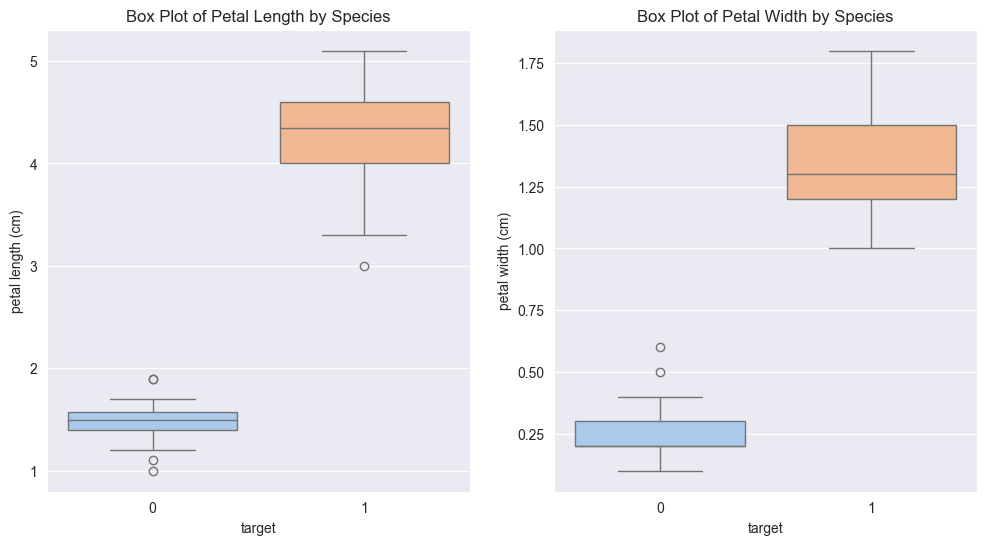

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='petal length (cm)', x='target', palette='pastel', color="green")
plt.title('Box Plot of Petal Length by Species')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='petal width (cm)', x='target', palette='pastel', color = "blue")
plt.title('Box Plot of Petal Width by Species')
plt.show()

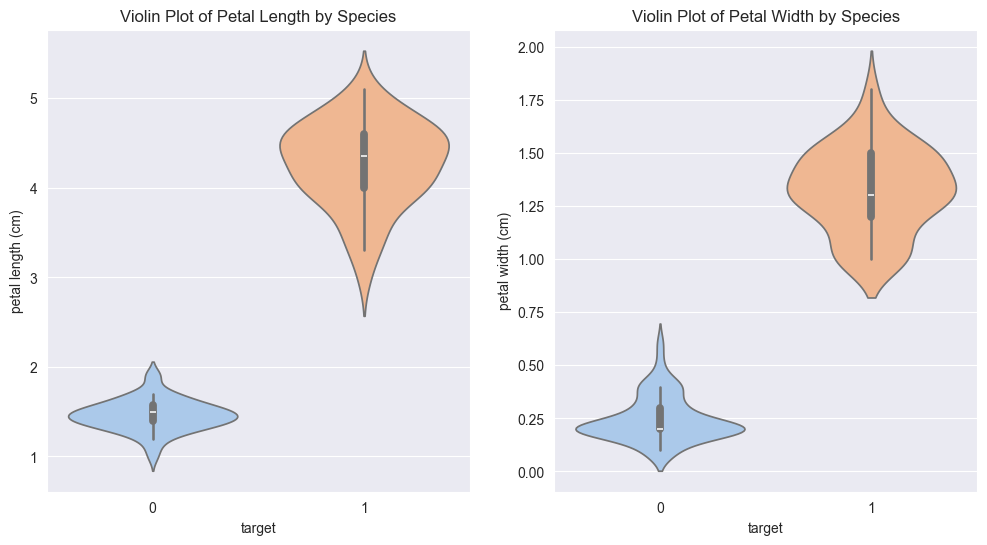

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='petal length (cm)', x='target', palette='pastel')
plt.title('Violin Plot of Petal Length by Species')
plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='petal width (cm)', x='target', palette='pastel')
plt.title('Violin Plot of Petal Width by Species')
plt.show()

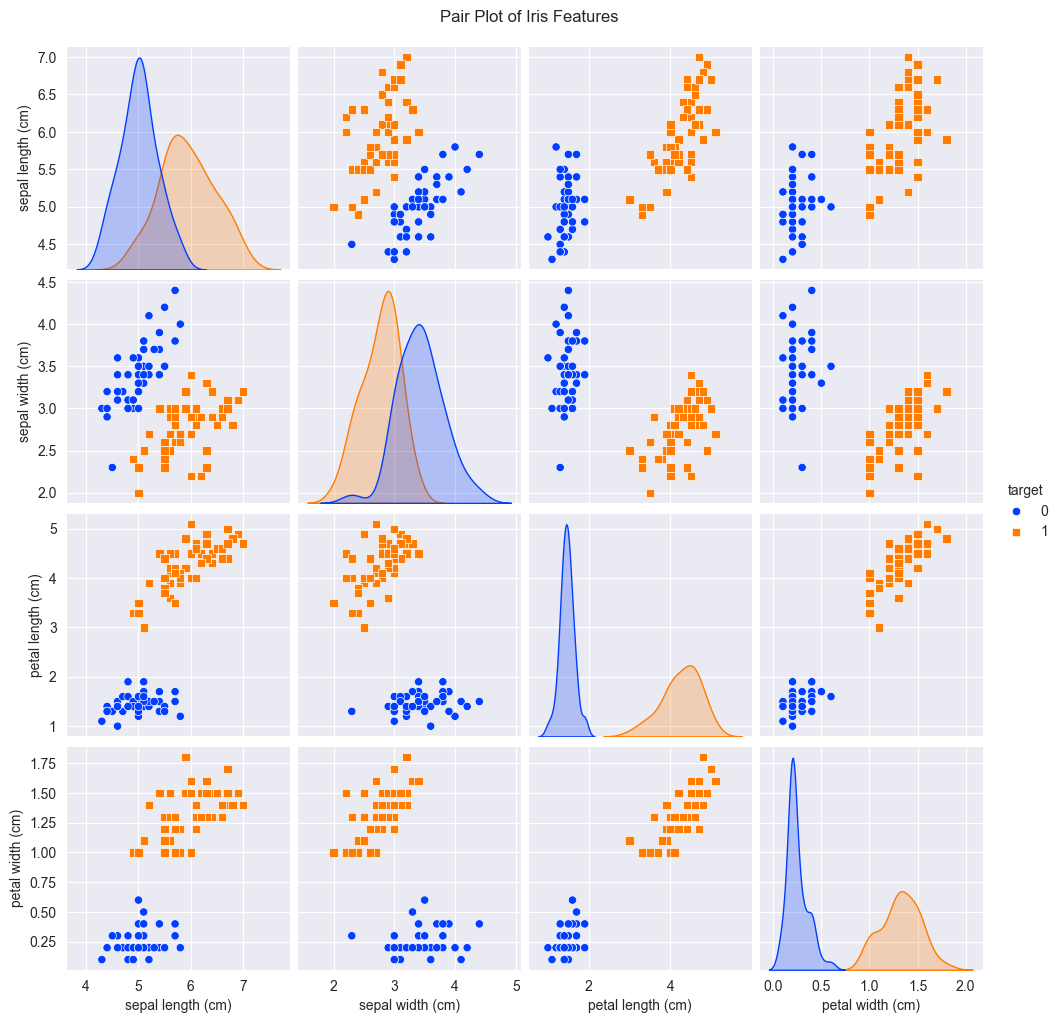

In [55]:
sns.pairplot(df, hue='target', markers=['o', 's'], palette='bright', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()

### Task 1(b): Train LinearSVC and Plot Decision Boundaries

In [56]:
# linear svc
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
# plot boundaries
# def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                          np.arange(y_min, y_max, 0.02))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.contourf(xx, yy, Z, alpha=0.8)
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
#     plt.xlabel('Petal Length')
#     plt.ylabel('Petal Width')
#     plt.title(title)
#     plt.show()

def plot_decision_boundaries(X, y, model, title="Decision Boundary"):
    # meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # prediction over grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 4))

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette='bright', markers=['s', 'o'], edgecolor='w')
    plt.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(Z.min(), Z.max(), 3), cmap='coolwarm')

    # labelling
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)
    plt.show()

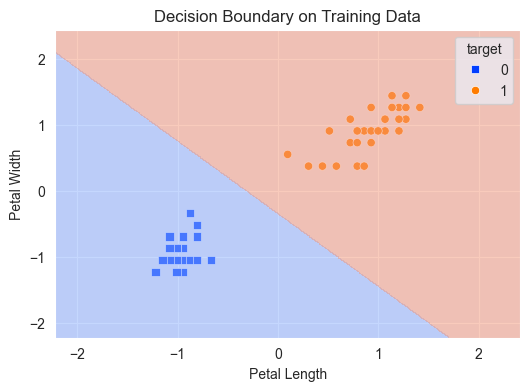

In [58]:
# train data plot
plot_decision_boundaries(X_train, y_train, svc, "Decision Boundary on Training Data")

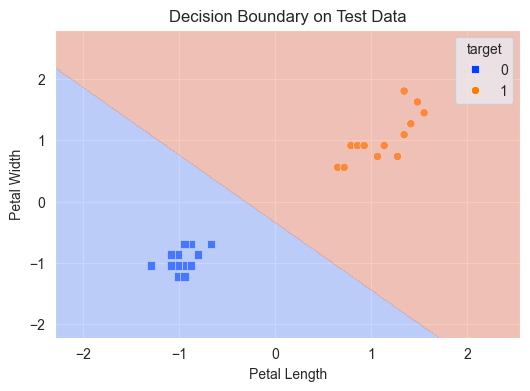

In [59]:
# test data plot
plot_decision_boundaries(X_test, y_test, svc, "Decision Boundary on Test Data")

#### Task-2 (a):
Generate a synthetic dataset using the make moons() function from scikit-learn Take around 500 data points, and add 5% noise (misclassifications) to the dataset.

In [60]:
# generating data
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

In [61]:
pprint.pprint(X)

array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523],
       [ 1.25490304, -0.48343549],
       [ 1.05385133, -0.44269047],
       [ 0.03137971,  1.05301203],
       [ 0.62054473,  0.71309598],
       [ 1.7876566 , -0.14295878],
       [ 0.99907493,  0.09180641],
       [-0.70723041,  0.57499903],
       [ 1.46479643, -0.47111862],
       [ 0.42712245,  0.83103216],
       [ 1.05341942, -0.50102941],
       [ 1.19597671, -0.49472393],
       [ 1.99422286,  0.42426007],
       [ 0.93175527,  0.39426183],
       [ 0.41104275, -0.33348189],
       [ 1.49073255, -0.38560138],
       [ 1.97517181,  0.35930615],
       [ 2.0470942 ,  0.41068552],
       [-0.00592133,  0.14862165],
       [ 0.82592072, -0.42998975],
       [ 0.54309448,  0.75144817],
       [ 1.8709548 ,  0.20141701],
       [ 1.9224317 ,  0.43263225],
       [-0.86765136,  0.45505598],
       [ 0.28216036,

In [62]:
pprint.pprint(y)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [63]:
# normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
pprint.pprint(X_scaled)

array([[ 3.75124610e-01, -1.40367864e+00],
       [ 2.26814579e-01,  1.13562771e+00],
       [ 5.95441542e-01, -1.49371022e+00],
       [-9.44918355e-01,  1.40974769e+00],
       [-2.43115122e-01,  1.61806199e+00],
       [ 8.63307743e-01, -1.47536691e+00],
       [ 6.31994868e-01, -1.39355455e+00],
       [-5.44373389e-01,  1.60968258e+00],
       [ 1.33469407e-01,  9.27161489e-01],
       [ 1.47624835e+00, -7.91720052e-01],
       [ 5.68973828e-01, -3.20332517e-01],
       [-1.39415493e+00,  6.49875138e-01],
       [ 1.10479310e+00, -1.45063573e+00],
       [-8.90656986e-02,  1.16396681e+00],
       [ 6.31497948e-01, -1.51069392e+00],
       [ 7.95512152e-01, -1.49803307e+00],
       [ 1.71390580e+00,  3.47204752e-01],
       [ 4.91521597e-01,  2.86970964e-01],
       [-1.07565622e-01, -1.17427347e+00],
       [ 1.13463298e+00, -1.27892474e+00],
       [ 1.69198729e+00,  2.16783084e-01],
       [ 1.77473503e+00,  3.19948276e-01],
       [-5.87288774e-01, -2.06252585e-01],
       [ 3.

#### Data Visualization

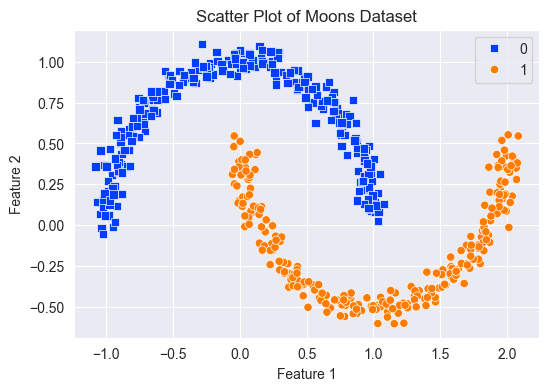

In [65]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette='bright', markers=['s', 'o'], edgecolor='w')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Scatter Plot of Moons Dataset")
plt.show()

#### Task-2 (b):
Implement SVM models with three different kernels: Linear, Polynomial, and RBF. Plot the decision boundaries for each kernel on the synthetic dataset. Analyze and comment on the differences in decision boundaries produced by these kernels. (5 pts)

In [66]:
# different kernels
kernels = ['linear', 'poly', 'rbf']
models = {}

#### Helper Code for Decision Boundaries

In [67]:
# function to plot boundaries
def plot_decision_boundaries_moons(X, y, model, title):
    plt.figure(figsize=(6, 4))
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, palette='bright', markers=['s', 'o'])
    plt.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(Z.min(), Z.max(), 3), cmap='coolwarm')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

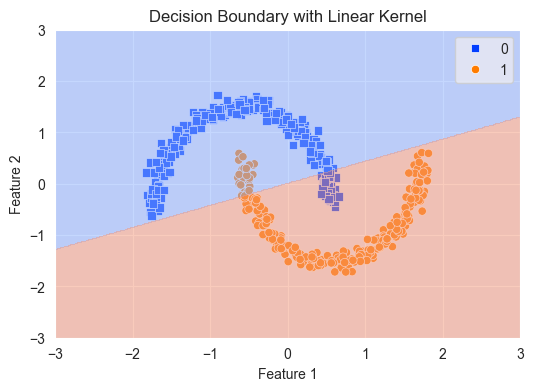

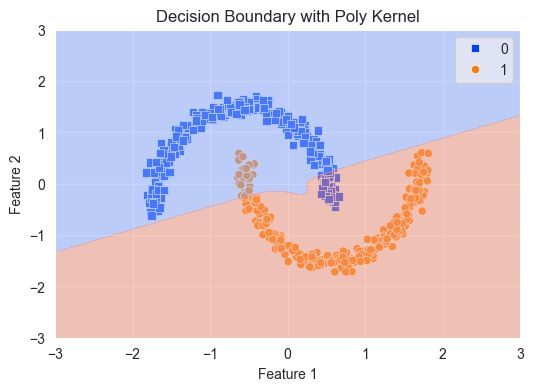

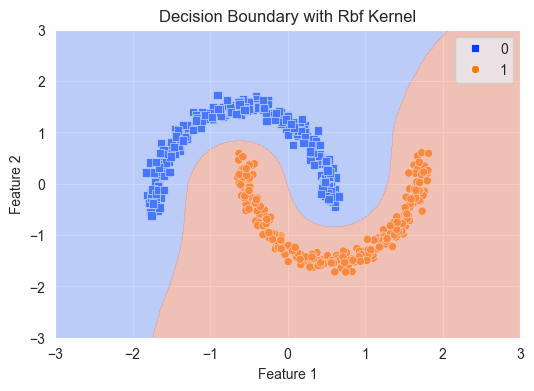

In [68]:
# training loop
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_scaled, y)
    models[kernel] = model
    plot_decision_boundaries_moons(X_scaled, y, model, f"Decision Boundary with {kernel.capitalize()} Kernel")

#### Task-2 (c):
Focus on the RBF kernel SVM model. Perform hyperparameter tuning to find the best values of gamma and C for this model. You can use techniques like grid search or random search. (2 pts)

In [69]:
# parameters to tune the model on
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100]
}

In [70]:
# performing grid search
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10, 100]})

In [71]:
# getting the best parameters
best_params = grid_search.best_params_
best_svc = grid_search.best_estimator_
print("Best parameters:", best_params)

Best parameters: {'C': 0.1, 'gamma': 10}


#### Task-2 (d):
Plot the decision boundary for the RBF kernel SVM with the best Hyperparameters. Explain the impact of the selected gamma and C values on the model’s performance and decision boundary. Note: Ensure to complete each task thoroughly and document your findings in the lab report. (2 pts)

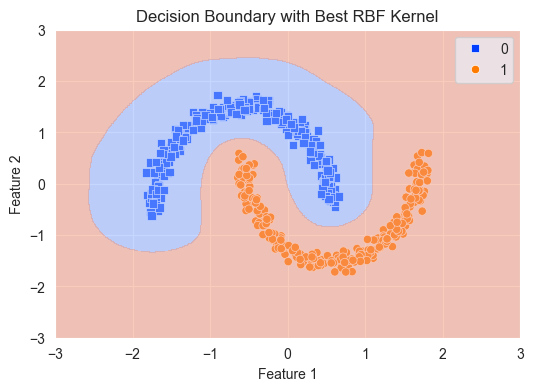

In [72]:
plot_decision_boundaries_moons(X_scaled, y, best_svc, "Decision Boundary with Best RBF Kernel")



---

